# Load and explore df

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 100)

In [ ]:
url = "https://drive.google.com/file/d/1JSY5fef1_9HlKZl1JRLTTa1kcxMNQA3Z/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.duplicated().sum() # Boolean series1

0

In [ ]:
# df.hist(figsize= (10,10), bins=20)

In [ ]:
#df.describe()

In [ ]:
df = df.drop(columns = 'Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Splitting and pipe branching

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# Baseline Models

## Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr_full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"]
}

lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

lr_search.fit(X_train, y_train)

lr_search.best_params_

print(
        f"""
        best_params_: {lr_search.best_params_}
        best_score_: {lr_search.best_score_}
        MSE: {mean_squared_error(y_test, lr_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, lr_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, lr_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(lr_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, lr_search.predict(X_test))}
        """
    )

# create a DataFrame to track performance of the models we try
performances = pd.DataFrame(columns=["r2_score"])

# add model performances to DataFrame
performances.loc["Baseline_ln_reg"] = r2_score(y_test, lr_search.predict(X_test))

performances

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean'}
        best_score_: 0.21608232904335017
        MSE: 630549718.3432745
        RMSE: 25110.749059780643
        MAE: 16481.92099750296
        MAPE: 9.510442153817676
        R2 Score: 0.8979629443159689
        


,r2_score
Baseline_ln_reg,0.8979629443159689


## Decision Tree Regressor



In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(dt_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)

print(
        f"""
        best_score_: {dt_search.best_score_}
        best_params_: {dt_search.best_params_}
        MSE: {mean_squared_error(y_test, dt_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, dt_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, dt_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, dt_search.predict(X_test))}
        """
    )


# add model performances to DataFrame
performances.loc["Baseline_tree"] = r2_score(y_test, dt_search.predict(X_test))

performances

Fitting 5 folds for each of 60 candidates, totalling 300 fits

        best_score_: 0.7574149666486352
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'decisiontreeregressor__max_depth': 6, 'decisiontreeregressor__min_samples_leaf': 3}
        MSE: 1739157175.1876652
        RMSE: 41703.20341637637
        MAE: 25760.10896003831
        MAPE: 13.729759163923031
        R2 Score: 0.7185654479488696
        


,r2_score
Baseline_ln_reg,0.8979629443159689
Baseline_tree,0.7185654479488696


## KNN


In [ ]:
# solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsRegressor()
                                 )


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsregressor__n_neighbors": range(2, 6),
    "kneighborsregressor__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

print(
        f"""
        best_score_: {knn_search.best_score_}
        best_params_: {knn_search.best_params_}
        MSE: {mean_squared_error(y_test, knn_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, knn_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, knn_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, knn_search.predict(X_test))}
        """
    )

# add model performances to DataFrame
performances.loc["Baseline_knn"] = r2_score(y_test, knn_search.predict(X_test))

performances

Fitting 5 folds for each of 16 candidates, totalling 80 fits

        best_score_: 0.6576928741939129
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'distance'}
        MSE: 2669653626.483311
        RMSE: 51668.69096932214
        MAE: 30435.657097334566
        MAPE: 16.596996969836773
        R2 Score: 0.5679902982777083
        


,r2_score
Baseline_ln_reg,0.8979629443159689
Baseline_tree,0.7185654479488696
Baseline_knn,0.5679902982777083


## Plot predictions


        MSE: 667488112.1581452
        RMSE: 25835.79130118033
        MAE: 16793.382699581376
        MAPE: 0.09896449274538406
        R_squared: 0.8919854855416322
        
477312.1213359168 58014.33027562933


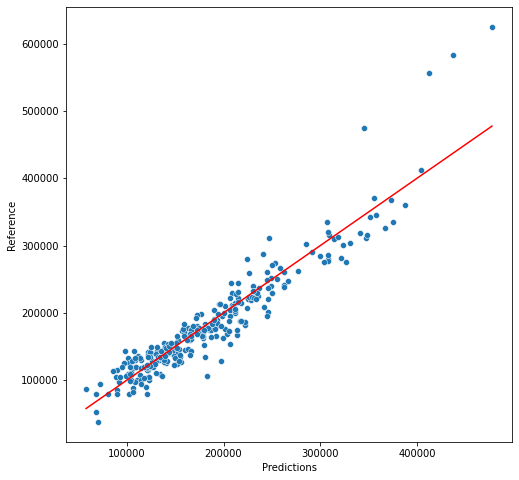

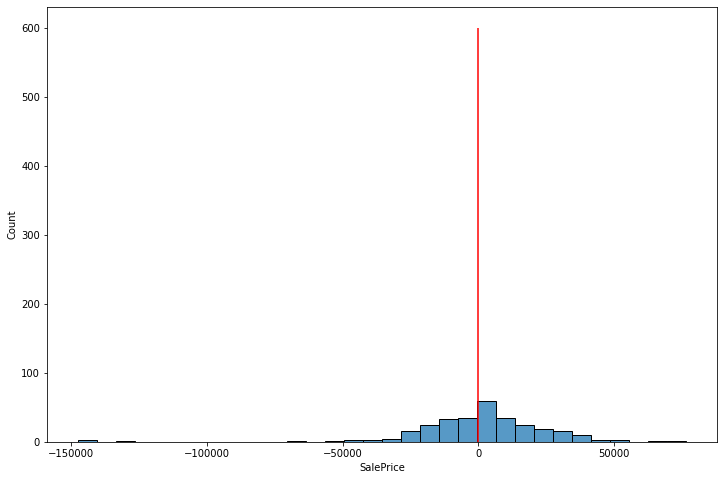

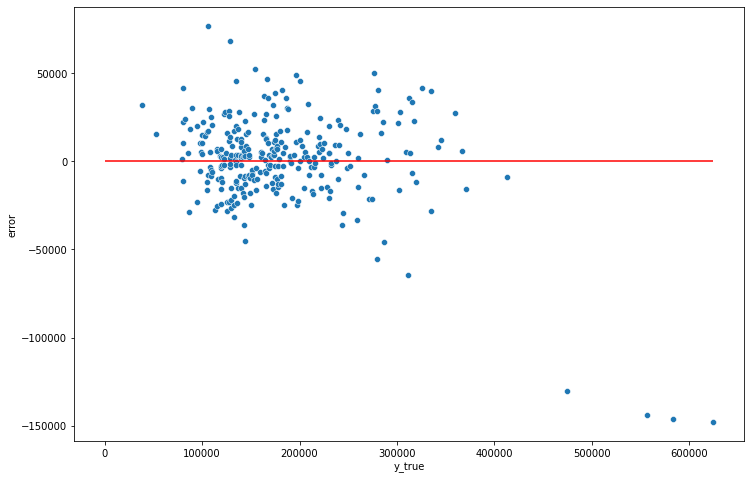

{'mse': 667488112.1581452,
 'rmse': 25835.79130118033,
 'mae': 16793.382699581376,
 'mape': 0.09896449274538406,
 'R squared': 0.8919854855416322}

In [ ]:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]


def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        R_squared: {r2_score(y_true, y_pred) }
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred),
        'R squared': r2_score(y_true, y_pred)
    }

    

# plot_predictions(y_test, results['predictions'])

plot_predictions(y_test, lr_search.predict(X_test))

# PCA

In [ ]:
# PCA on DecisionTree #MinMaxScaling in preprocessor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


float_range_array = np.arange(0.81, 0.99, 0.3)
float_range_list = list(float_range_array)

pca = PCA(n_components=0.95)

dt_full_pipeline = make_pipeline(preprocessor, 
                              pca,
                              DecisionTreeRegressor())

dt_full_pipeline.fit(X_train, y_train)

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(1, 15, 3),
    "decisiontreeregressor__min_samples_leaf": range(1, 15, 3), 
    #"pca__n_components": range(70, 250, 20)
}

dt_search = GridSearchCV(dt_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)

print(
        f"""
        best_params: {dt_search.best_params_}
        best_score: {dt_search.best_score_}
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 50 candidates, totalling 250 fits

        best_params: {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 10}
        best_score: 0.7942382321581645
        MSE: 1481286337.183332
        RMSE: 38487.4828636965
        MAE: 23320.361750078908
        MAPE: 0.12478330705489846
        R2 Score: 0.6926168571366706
        


In [ ]:
# PCA on Linear Regression: 
lr_full_pipeline = make_pipeline(preprocessor, 
                              pca,
                              LinearRegression())

lr_full_pipeline.fit(X_train, y_train)

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "pca__n_components": range(60, 250, 20)
}

lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

lr_search.fit(X_train, y_train)

print(
        f"""
        best_params: {lr_search.best_params_}
        best_score: {lr_search.best_score_}
        MSE: {mean_squared_error(lr_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(lr_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(lr_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(lr_search.predict(X_test), y_test)}
        R2 Score: {r2_score(lr_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 20 candidates, totalling 100 fits

        best_params: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'pca__n_components': 140}
        best_score: 0.7863939458392024
        MSE: 765064715.2259374
        RMSE: 27659.803239103807
        MAE: 18254.09084838214
        MAPE: 0.10823599789503849
        R2 Score: 0.8554787245784186
        


In [ ]:
# PCA on KNN:
from sklearn.neighbors import KNeighborsRegressor
knn_full_pipeline = make_pipeline(preprocessor, 
                              pca,
                              KNeighborsRegressor())

knn_full_pipeline.fit(X_train, y_train)

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsregressor__n_neighbors": range(2, 6),
    "kneighborsregressor__weights": ["uniform", "distance"], 
    "pca__n_components": range(1, 20, 3)
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

print(
        f"""
        best_params: {knn_search.best_params_}
        best_score: {knn_search.best_score_}
        MSE: {mean_squared_error(knn_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(knn_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(knn_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test)}
        R2 Score: {r2_score(knn_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 112 candidates, totalling 560 fits

        best_params: {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'distance', 'pca__n_components': 10}
        best_score: 0.7938351607118431
        MSE: 861194485.911381
        RMSE: 29346.11534618136
        MAE: 18337.783997490544
        MAPE: 0.10037024633217084
        R2 Score: 0.8115860105456496
        


In [ ]:
preprocessor.fit(X_train)
X_train_fs = preprocessor.transform(X_train)
X_test_fs = preprocessor.transform(X_test)


pca = PCA(n_components=0.95) 
pca.fit(X_train_fs)
pca.explained_variance_ratio_

array([0.16726521, 0.0722207 , 0.06201628, 0.04433937, 0.03332863,
       0.02776739, 0.02550029, 0.02491086, 0.02408454, 0.02251745,
       0.02221705, 0.02120852, 0.02069555, 0.01997268, 0.01952223,
       0.01817581, 0.01770186, 0.01692913, 0.01641935, 0.01629046,
       0.01454054, 0.0136783 , 0.01289831, 0.01214039, 0.01173707,
       0.009338  , 0.00906832, 0.00803524, 0.00791549, 0.00654771,
       0.00629792, 0.00615904, 0.00587962, 0.00557295, 0.00551888,
       0.00532952, 0.00522718, 0.00498506, 0.00478582, 0.00459503,
       0.00441714, 0.00428618, 0.00408087, 0.00388412, 0.00380067,
       0.00359821, 0.00353553, 0.00342542, 0.00329504, 0.00325923,
       0.0032082 , 0.00314646, 0.00298764, 0.00296751, 0.00282285,
       0.00265372, 0.00251957, 0.00243616, 0.00239264, 0.00234919,
       0.00226828, 0.00213716, 0.00206554, 0.00202942, 0.00200272,
       0.00191172, 0.0018488 , 0.00181035, 0.00173038, 0.00166603,
       0.00164969, 0.0015883 , 0.00153629, 0.00150192, 0.00146

In [ ]:
dt_full_pipeline['pca'].explained_variance_ratio_

array([0.16726521, 0.0722207 , 0.06201628, 0.04433937, 0.03332863,
       0.02776739, 0.02550029, 0.02491086, 0.02408454, 0.02251745,
       0.02221705, 0.02120852, 0.02069555, 0.01997268, 0.01952223,
       0.01817581, 0.01770186, 0.01692913, 0.01641935, 0.01629046,
       0.01454054, 0.0136783 , 0.01289831, 0.01214039, 0.01173707,
       0.009338  , 0.00906832, 0.00803524, 0.00791549, 0.00654771,
       0.00629792, 0.00615904, 0.00587962, 0.00557295, 0.00551888,
       0.00532952, 0.00522718, 0.00498506, 0.00478582, 0.00459503,
       0.00441714, 0.00428618, 0.00408087, 0.00388412, 0.00380067,
       0.00359821, 0.00353553, 0.00342542, 0.00329504, 0.00325923,
       0.0032082 , 0.00314646, 0.00298764, 0.00296751, 0.00282285,
       0.00265372, 0.00251957, 0.00243616, 0.00239264, 0.00234919,
       0.00226828, 0.00213716, 0.00206554, 0.00202942, 0.00200272,
       0.00191172, 0.0018488 , 0.00181035, 0.00173038, 0.00166603,
       0.00164969, 0.0015883 , 0.00153629, 0.00150192, 0.00146

In [ ]:
start = 1.0
stop = 3.0
step = 0.5
float_range_array = np.arange(start, stop, step)
float_range_list = list(float_range_array)
float_range_list

[1.0, 1.5, 2.0, 2.5]